# Installing the required packages

In [ ]:
# !pip install langchain python-dotenv chromadb pypdf

In [ ]:
# !pip install -U langchain-community

In [ ]:
# !pip install langchain_cohere

In [ ]:
# !pip install transformers -U

# Loading Environment variables and required documents

In [3]:
#loading environment variables
import os

from dotenv import load_dotenv, find_dotenv
_ = load_dotenv(find_dotenv())

In [ ]:
#setting up the api keys
from google.colab import userdata
os.environ["HUGGINGFACEHUB_API_TOKEN"] = userdata.get('HUGGINGFACEHUB_API_TOKEN')
os.environ["COHERE_API_KEY"] = userdata.get('COHERE_API_KEY')

In [ ]:
#connecting colab to drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [6]:
# #loading all documents
# from pypdf import PdfReader
# from langchain.document_loaders import PyPDFLoader
# docs = []
# directory = "/rag/pidilite/"
# for file in os.listdir(directory):
#   file_path = f'/rag/pidilite/{file}'
#   loader = PyPDFLoader(file_path)
#   print(file)
#   docs.extend(loader.load())

In [ ]:
#loading the annual report document only
from langchain.document_loaders import PyPDFLoader
docs =[]
file_path = f'/rag/pidilite/Annual-Report-2022-2023.pdf'
loader = PyPDFLoader(file_path)
docs.extend(loader.load())

In [ ]:
len(docs)

278

# Embedding

In [ ]:
embedding_model_name = 'BAAI/bge-small-en-v1.5'

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
from transformers import AutoTokenizer
def plot_docs_tokens(docs,embedding_model_name):
    tokenizer= AutoTokenizer.from_pretrained(embedding_model_name)
    lengths= [
        len(tokenizer.encode(doc.page_content))
        # len(doc.page_content)
        for doc in docs
    ]
    print(max(lengths))
    print(min(lengths))
    fig = pd.Series(lengths).hist()
    plt.show()


In [ ]:
# document split into chunks
from langchain.text_splitter import RecursiveCharacterTextSplitter
text_splitter = RecursiveCharacterTextSplitter.from_huggingface_tokenizer(
    AutoTokenizer.from_pretrained(embedding_model_name),
    chunk_size=400,
    chunk_overlap = 50
)
chunks = text_splitter.split_documents(docs)

356
4


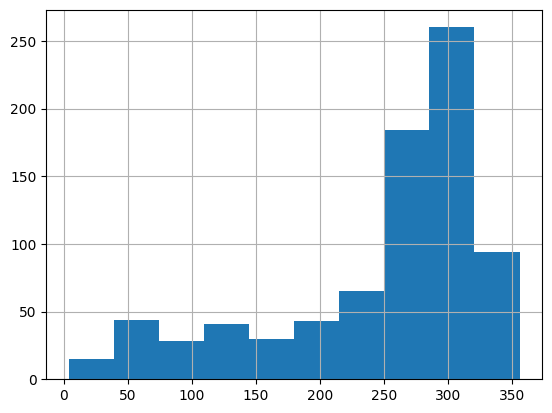

In [ ]:
#plotting graph to decide chunk size
plot_docs_tokens(chunks,embedding_model_name)

In [ ]:
#creating vector database
from langchain.embeddings import HuggingFaceEmbeddings
from langchain.vectorstores import Chroma

vectordb = Chroma.from_documents(
    documents=chunks,
    embedding=HuggingFaceEmbeddings(),
    persist_directory='/rag/pidilite/vectordb5_annualreport/'
)

In [ ]:
vectordb.persist()

# loading the vector database

In [ ]:
# pip install sentence-transformers

In [ ]:
vectordb5 = Chroma(persist_directory='/rag/pidilite/vectordb5_annualreport/',  embedding_function=HuggingFaceEmbeddings())
vectordb5.get()

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


modules.json:   0%|          | 0.00/349 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/116 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/10.6k [00:00<?, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

/usr/local/lib/python3.10/dist-packages/huggingface_hub/file_download.py:1132: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(


config.json:   0%|          | 0.00/571 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/438M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/363 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/239 [00:00<?, ?B/s]

1_Pooling/config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

{'ids': ['00033334-4792-49a4-a081-3c431aa890d3',
  '004fcb85-0272-45c7-a218-f9deb21256a3',
  '00cdbcbc-c934-4c83-bb60-29bf36cf1715',
  '00d3fc9f-70ba-4706-abbf-288d3c7e0473',
  '01169da7-7a77-4856-86f7-a3f01f149684',
  '0130b754-732a-46f9-bc02-68352699308a',
  '017c8ed5-9f02-494e-b40d-a3ba16914265',
  '01a0a9d6-de04-4064-a17d-c536ed40f3fa',
  '01a2160e-b44d-4c50-af5c-855e9b9a4ca8',
  '01ff8af1-56d5-4c70-b4bb-080b04a93a2e',
  '0208cccc-b05b-4571-9629-7312938679f4',
  '020bdb07-0fa0-4575-8f7a-1cbb5479f813',
  '02142f3d-0568-47a3-a55a-72579bcfac70',
  '0269fa2c-f9b4-4d83-9b49-a16c50207e49',
  '02b5301f-a19d-46b1-8bbb-d3467befb162',
  '02ceaa42-e4e6-4266-af6b-02cb52f7434d',
  '03126e2f-bf64-4656-90fe-b20763898759',
  '0328c079-7886-45a6-89a3-413223365070',
  '033a1f8c-8a12-4b63-a57d-b203da42dc94',
  '036e4f00-6396-4518-9ce9-b79436d6056b',
  '037f508d-12b4-4f59-bb01-89e84be3cc9d',
  '03948108-4cf9-4cb6-bffd-fb25e2409a80',
  '03b4e689-29a6-472f-b567-2b079e230baa',
  '03c33cd8-ec2d-4adc-a8ad-

# Default retriever (with MMR)

In [ ]:
retriever = vectordb5.as_retriever(search_kwargs={"k": 12})
# retriever = vectordb3.as_retriever()
# search_type="mmr"

# MultiQuery retriever

In [ ]:
from langchain.retrievers.multi_query import MultiQueryRetriever

mq_retriever = MultiQueryRetriever.from_llm(
    retriever=retriever, llm=llm
)

#exceeding max token limit

# Contextual Compression

In [ ]:
from langchain.retrievers import ContextualCompressionRetriever
from langchain.retrievers.document_compressors import LLMChainExtractor

compressor = LLMChainExtractor.from_llm(chat)
compression_retriever = ContextualCompressionRetriever(base_compressor=compressor,
                                                       base_retriever=retriever)

#time consuming. results are similar as mmr

# Parent Retriever

In [ ]:
from langchain.retrievers import ParentDocumentRetriever
from langchain.storage import InMemoryStore,LocalFileStore
from langchain.storage._lc_store import create_kv_docstore

In [ ]:
local_store = LocalFileStore('/rag/pidilite/local_file_store')
docstore = create_kv_docstore(local_store)

In [7]:
vectorstore = Chroma(
    persist_directory='/rag/pidilite/local_vector_store',
    embedding_function=HuggingFaceEmbeddings(),
)

In [ ]:
vectorstore2 = Chroma(persist_directory='/rag/pidilite/local_vector_store/',  embedding_function=HuggingFaceEmbeddings())
vectorstore2.get()

model.safetensors:  96%|#########5| 419M/438M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/363 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/239 [00:00<?, ?B/s]

1_Pooling/config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

{'ids': ['000c7bf5-14c1-4380-84d5-43f2d6700f29',
  '00246091-718b-49b5-9e78-cd51b0b795d6',
  '0025b393-9e0a-4cd4-81dc-2913906b3d03',
  '004859ab-a159-4aa2-980c-5b9aa687bccb',
  '0055be98-29f9-46b8-8448-fc88a9af5135',
  '0059913e-c419-4c2f-ae66-bd6a3bd43b81',
  '00ae2cdc-84dd-4937-9902-b89518561dca',
  '00c68cbb-1a59-405f-a30a-85fc3fe3ffae',
  '00e10dba-fd44-4920-a614-64ae6b542712',
  '00e25e43-76e6-42df-b1c8-6ca4ab8b324d',
  '00f78236-d3c4-476d-b144-c5376f2b4e40',
  '00fc5b1a-1343-4d6d-b5ba-26524759afc0',
  '011d41ec-4353-4ffe-b11f-807acc3eca6d',
  '013972d8-15e0-49b6-8346-159266c28e57',
  '014de64c-64a0-401d-b3f9-8414a2772e26',
  '015bbc45-4f2c-48ca-96bc-dd9fe530df94',
  '016e49fb-98de-43a5-8d21-05e7436d3c15',
  '018e3471-ab98-4801-8971-38a6e1207bf0',
  '01c0ad7a-6657-4dc8-aa08-0d36fcf1b32d',
  '01c47039-cbec-4902-be6f-e18eab8738a4',
  '01cb83d6-ad21-4e8a-94e7-89c9c73b1a6e',
  '01d06389-082e-4628-8ce0-d3b86edd180f',
  '01d6f330-1438-438a-bcf1-2fb079be46a7',
  '01ddfd82-2cb0-40ea-b3a8-

In [ ]:
# This text splitter is used to create the parent documents
parent_splitter = RecursiveCharacterTextSplitter(chunk_size=2000,chunk_overlap=40)

# This text splitter is used to create the child documents
# It should create documents smaller than the parent
child_splitter = RecursiveCharacterTextSplitter(chunk_size=400,chunk_overlap=40)

# The storage layer for the parent documents
# store = InMemoryStore()
# The storage layer for the parent documents
pd_retriever = ParentDocumentRetriever(
    vectorstore=vectorstore2,
    docstore=docstore,
    child_splitter=child_splitter,
    parent_splitter=parent_splitter,
)

In [ ]:
vectorstore.persist()

/usr/local/lib/python3.10/dist-packages/langchain_core/_api/deprecation.py:119: LangChainDeprecationWarning: Since Chroma 0.4.x the manual persistence method is no longer supported as docs are automatically persisted.
  warn_deprecated(


In [ ]:
pd_retriever.add_documents(docs, ids=None)

# Ensemble retriever

In [ ]:
from langchain.retrievers import BM25Retriever, EnsembleRetriever

In [8]:
# !pip install rank_bm25

In [ ]:
bm25_retriever = BM25Retriever.from_documents(chunks)
bm25_retriever.k = 10

In [ ]:
# vectordb_retriever = vectordb3.as_retriever(search_kwargs={"k": 3})
vectordb_retriever = vectordb5.as_retriever(search_type="mmr", search_kwargs={"score_threshold": 10})

In [ ]:
ensemble_retriever = EnsembleRetriever(retrievers=[bm25_retriever, retriever], weights=[0.5, 0.5])

In [ ]:
#emsemble retriever(combines multiple retrievers together)
#self query (additional filter using meta data)

In [ ]:
# !pip install langchain langchain_cohere

#testing retrievers using llm

In [ ]:
template = """Here is the context:
{context}
Use these to synthesize an answer to the question with steps: {question}
Answer:
"""
prompt = ChatPromptTemplate.from_template(template)

In [ ]:
question = "calculate the current ratio of the year 2023"

In [ ]:
from langchain_cohere.chat_models import ChatCohere
chat = ChatCohere(model="command-r-plus", temperature=0)

In [9]:
# from langchain_community.llms import HuggingFaceHub
# llm = HuggingFaceHub(task='text-generation',
#                      repo_id="mistralai/Mixtral-8x7B-Instruct-v0.1",
#                      model_kwargs={"max_token_length":3000, "max_new_token":4000}
#                      )

In [ ]:
a=chat.invoke(prompt)

In [ ]:
b=a.content.split('\n')

In [ ]:
b = [ele for ele in b if ele != ""]
b

['Sure! To calculate the current ratio for the year 2023, you would need to retrieve the following terms from the balance sheet:',
 '- Current Assets: This includes cash, accounts receivable, inventory, marketable securities, and other assets that are expected to be converted into cash within one year.',
 '- Current Liabilities: These are obligations or debts that are due to be paid within one year. Examples include accounts payable, short-term loans, accrued expenses, and any other payments that need to be made within the next 12 months.',
 'The formula for the current ratio is:',
 'Current Ratio = Current Assets / Current Liabilities',
 'So, to answer your question, you would need to identify and sum up all the current assets and current liabilities from the 2023 balance sheet, and then perform the division to calculate the current ratio. ',
 "This ratio is a liquidity ratio that provides insight into a company's ability to pay off its short-term obligations using its current assets.

In [ ]:
# retrieved_total=[]
# for i in b:
#   retrieved_temp = retriever.invoke(i)
#   for i in retrieved_temp:
#     if(i not in retrieved_total):
#       retrieved_total.append(i)

In [ ]:
# retrieving the whole page
retrieved_total=[]
pages=[]
for i in b:
  retrieved_temp = retriever.invoke(i)
  for i in retrieved_temp:
    if(i not in retrieved_total and i.metadata['page'] not in pages):
      pages.append(i.metadata['page'])

In [ ]:
context2 =[]
for i in pages:
  context2.append(docs[i])

In [ ]:
context2=sorted(context2, key=lambda x:x.metadata['page'])

In [ ]:
# retrieved_question=retriever.invoke(question)

In [ ]:
len(retrieved_total)

0

In [ ]:
# retrieved_documents=retriever.invoke(a.content)

In [ ]:
# # merging retrieved_question with retrieved_documents
# for i in retrieved_documents:
#   if(i not in retrieved_question):
#     retrieved_question.append(i)

In [ ]:
retrieved_total=sorted(retrieved_total, key=lambda x:x.metadata['page'])

In [ ]:
def pretty_print_docs(docs):
    print(
        f"\n{'-' * 100}\n".join(
            [
                f"Document {i+1}:content: {d.metadata}"
                for i, d in enumerate(docs)
            ]
        )
    )

In [ ]:
pretty_print_docs(context2)

Document 1:content: {'source': '/content/drive/MyDrive/pidilite/Annual-Report-2022-2023.pdf', 'page': 25}
----------------------------------------------------------------------------------------------------
Document 2:content: {'source': '/content/drive/MyDrive/pidilite/Annual-Report-2022-2023.pdf', 'page': 26}
----------------------------------------------------------------------------------------------------
Document 3:content: {'source': '/content/drive/MyDrive/pidilite/Annual-Report-2022-2023.pdf', 'page': 29}
----------------------------------------------------------------------------------------------------
Document 4:content: {'source': '/content/drive/MyDrive/pidilite/Annual-Report-2022-2023.pdf', 'page': 37}
----------------------------------------------------------------------------------------------------
Document 5:content: {'source': '/content/drive/MyDrive/pidilite/Annual-Report-2022-2023.pdf', 'page': 39}
------------------------------------------------------------------

In [ ]:
template = """Here is the context:
{context}
Use these to synthesize an answer to the question with steps: {question}
Answer:
"""
prompt = ChatPromptTemplate.from_template(template)
answer = chat.invoke(prompt.invoke({'question':question,'context':context2}))

In [ ]:
answer.content
# answer[answer.find('\nAnswer:')+8:]

'The current ratio for the year 2023 is **1.86**.'

# .py file

In [ ]:
from langchain.prompts import ChatPromptTemplate
from langchain_community.llms import HuggingFaceHub
from langchain_cohere.chat_models import ChatCohere
template = """You are a helpful finance assistant that would assist in telling what all terms to retrieve \
from the balance sheet to answer the given question. Also retrieve the terms required to calculate the previously retrieved terms.
question : {question}"""

#prompt, llm, retriever initialized
prompt_decomposition = ChatPromptTemplate.from_template(template)
chat = ChatCohere(model="command-r-plus", temperature=0)
retriever = vectordb5.as_retriever(search_kwargs={"k": 11})

#defining rag function
def rag(question):
  prompt = prompt_decomposition.format(question=question)
  a=chat.invoke(prompt)
  b=a.content.split('\n')
  b = [ele for ele in b if ele != ""]
  retrieved_total=[]
  pages=[]
  for i in b:
    retrieved_temp = retriever.invoke(i)
    for i in retrieved_temp:
      if(i not in retrieved_total and i.metadata['page'] not in pages):
        pages.append(i.metadata['page'])
  context2 =[]
  for i in pages:
    context2.append(docs[i])
  context2=sorted(context2, key=lambda x:x.metadata['page'])
  template = """Here is the context:
  {context}
  Use these to synthesize an answer to the question with steps: {question}
  Answer:
  """
  prompt = ChatPromptTemplate.from_template(template)
  answer = chat.invoke(prompt.invoke({'question':question,'context':context2}))
  return answer.content

### sample question 1

In [ ]:
rag("Calculate the quick ratio for the year 2023")

"The quick ratio, also known as the acid-test ratio, is a measure of a company's ability to cover its short-term obligations or those that are due within a year. It is calculated by dividing a company's quick assets (current assets minus inventories) by its current liabilities. \n\nFor the year 2023, the quick ratio is calculated as follows:\n\nQuick Ratio = (Current Assets - Inventories) / Current Liabilities\n\nFrom the provided context, we can find the following values:\n\n- Current Assets = 3,661.69 crores\n- Inventories = 1,561.24 crores\n- Current Liabilities = 1,973.24 crores\n\nNow, we can calculate the quick ratio:\n\nQuick Ratio = (3,661.69 - 1,561.24) / 1,973.24\nQuick Ratio = 2,100.45 / 1,973.24\nQuick Ratio ≈ 1.0649\n\nSo, the quick ratio for the year 2023 is approximately **1.06**."

### sample question 2

In [ ]:
rag("How did the ebidta improve?")

'The EBITDA improved by 7.4% in the year 2022-23.'

# Tools (ReAct)

In [10]:
from langchain.chains import RetrievalQA

qa = RetrievalQA.from_chain_type(
    llm=llm,
    chain_type="stuff",
    retriever=pd_retriever,
    return_source_documents=True,
)

In [ ]:
answer = qa({"query": "calculate the quick ratio?"})

In [ ]:
answer=answer['result']

In [ ]:
i=answer.find('\nHelpful Answer:')
answer[i+17:]

'The quick ratio is calculated by dividing current assets excluding inventory by current liabilities.\n\nFrom the given data, the current assets excluding inventory for the year 2022-23 is 1,361 crores and the current liabilities for the same year is 729 crores.\n\nSo, the quick ratio for the year 2022-23 is:\n\n1,361 crores / 7'

In [ ]:
from langchain.tools.retriever import create_retriever_tool

tool_search = create_retriever_tool(
    retriever=ensemble_retriever,
    # retriever = ensemble_retriever,
    name="vectordb_search",
    description="Searches and returns relevant information from the vectorstore to answer the query",
)

In [ ]:
# tool_search.invoke({'query': 'What is the quick ratio?'})

In [ ]:
tool_search.args_schema.schema()

{'title': 'RetrieverInput',
 'description': 'Input to the retriever.',
 'type': 'object',
 'properties': {'query': {'title': 'Query',
   'description': 'query to look up in retriever',
   'type': 'string'}},
 'required': ['query']}

In [ ]:
# !pip install langchainhub

In [ ]:
from langchain import hub
prompt = hub.pull("hwchase17/react")
print(prompt.template)

Answer the following questions as best you can. You have access to the following tools:

{tools}

Use the following format:

Question: the input question you must answer
Thought: you should always think about what to do
Action: the action to take, should be one of [{tool_names}]
Action Input: the input to the action
Observation: the result of the action
... (this Thought/Action/Action Input/Observation can repeat N times)
Thought: I now know the final answer
Final Answer: the final answer to the original input question

Begin!

Question: {input}
Thought:{agent_scratchpad}


In [ ]:
from langchain.agents import create_react_agent
react_agent = create_react_agent(llm=chat, tools=[tool_search], prompt = prompt)

In [ ]:
from langchain.agents import AgentExecutor
agent_executor = AgentExecutor(
agent=react_agent,
tools=[tool_search],
verbose=True,
handle_parsing_errors=True,
max_iterations = 5 # useful when agent is stuck in a loop
)

In [ ]:
query = "how is the quick ratio"
output = agent_executor.invoke({"input": query})



> Entering new AgentExecutor chain...
Action: vectordb_search
Action Input: how is the quick ratio calculated
ObservationInventory turnover ratio COGS $ Average Inventory  4.09  4.06 0.8%
Trade Receivables turnover ratio Sale of Products Average Trade Receivable  8.38  8.00 4.7%
Trade payables turnover ratio COGS $ Average Trade Payables  6.52  5.64 15.6%
Net capital turnover ratio Sale of Products Working Capital (Current 
Assets - Current 
Liabilities) 6.24  6.70 (6.8%)
Net profit ratio Profit Before Tax 
(PBT)Revenue from 
Operations15.82% 17.97% (12.0%)
Return on Capital employed Profit Before Interest 
and Tax (PBIT)Average  
Capital Employed ~23.69% 25.83% (8.3%)

Return on Average Capital Employed % (ROCE)  
(PBIT divided by Average Funds Employed**)##33.7 31.6 44.0 41.1 37.4  34.7  34.2  28.8  25.8  23.7
Gross Gearing %  
(Debt as a percentage of Debt plus Equity)0.4 0.2 - - - - - 1.0 1.6 -
Current Ratio 1.8 1.7 2.5 3.4 3.0 3.0 2.6 1.3 1.7 1.9
Assets Turnover (times)  
(Sales

In [ ]:
output['output']

"The quick ratio, also known as the acid-test ratio, is a measure of a company's ability to cover its short-term obligations or those payable within a year. It is calculated by dividing a company's quick assets (current assets minus inventories) by its current liabilities. \n\nUnfortunately, I was unable to find the information required to calculate the quick ratio in the provided text."

# New agent

In [ ]:
# !pip install langchain_cohere

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 169.8/169.8 kB 5.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 139.3/139.3 kB 14.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.1/3.1 MB 37.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.6/3.6 MB 29.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.3/12.3 MB 41.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 82.2/82.2 kB 7.5 MB/s eta 0:00:00
  Attempting uninstall: tokenizers
    Found existing installation: tokenizers 0.19.1
    Uninstalling tokenizers-0.19.1:
      Successfully uninstalled tokenizers-0.19.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
transformers 4.41.2 requires tokenizers<0.20,>=0.19, but you have tokenizers 0.15.2 which is incompatible.


In [ ]:
from langchain_cohere.react_multi_hop.agent import create_cohere_react_agent
from langchain_cohere.chat_models import ChatCohere

In [ ]:
chat = ChatCohere(model="command-r-plus", temperature=0)

In [ ]:
prompt = ChatPromptTemplate.from_template("{input}")

In [ ]:
agent = create_cohere_react_agent(
    llm=chat,
    tools=[tool_search],
    prompt=prompt,
)

In [ ]:
agent_executor = AgentExecutor(
    agent=agent, tools=[tool_search], verbose=True, max_iterations = 5
)

In [ ]:
preamble = """
You are an expert who answers the user's question by retrieving information from vector database,
This includes financial statements, reports, invoices, balance sheets, income statements, tax documents, and particularly annual reports.
"""

In [ ]:
output = agent_executor.invoke(
    {
        "input": "What is the quick ratio of 2022-2023",
        "preamble": preamble,
    }
)





> Entering new AgentExecutor chain...
Action: vectordb_search
Action Input: What is the quick ratio of 2022-2023?
ObservationOption Series Number Grant date Vesting date Exercise price 
()Fair value at 
grant date ( )
1 Granted on 8th November 2017-ESOP 2016  28,750 08.11.2017 08.11.2018  1.00  734.15 
 28,750 08.11.2017 08.11.2019  1.00  734.15 
2 Granted on 11th April 2018-ESOP 2016  4,150 11.04.2018 11.04.2019  1.00  976.94 
 4,150 11.04.2018 11.04.2020  1.00  976.94 
3 Granted on 30th October 2018-ESOP 2016  1,33,200 30.10.2018 30.10.2019  1.00  931.19 
 1,33,200 30.10.2018 30.10.2020  1.00  931.19 
 1,500 30.10.2018 30.10.2019  1.00  924.50 
 1,500 30.10.2018 30.10.2020  1.00  924.50 
 2,000 30.10.2018 30.10.2021  1.00  924.50 
4 Granted on 23rd January 2019-ESOP 2016  3,000 23.01.2019 23.01.2022  1.00  1,112.48 
 3,000 23.01.2019 23.01.2023  1.00  1,112.48 
 4,000 23.01.2019 23.01.2024  1.00  1,112.48 
 1,500 23.01.2019 29.01.2021  1.00  1,127.85 
 1,500 23.01.2019 29.01.2022  

In [ ]:
print(output['output'])

Agent stopped due to iteration limit or time limit.


# All of the testing of new theories, methods etc have been done below. No need to go through

# Prompt

In [ ]:
from langchain.prompts import ChatPromptTemplate
# from langchain.prompts import PromptTemplate
# Keep the answer concise.
template = """You are an assistant for question-answering tasks.
Use the following pieces of retrieved context to answer the question.
Perform the necessary calculations if needed to answer the question.
If you don't know the answer, just say that you don't know.
Keep the answer concise.

Question: {question}
Context: {context}
Answer:
"""
prompt = ChatPromptTemplate.from_template(template) #mmr k5
# prompt = PromptTemplate(
#     template=template, input_variables=["context", "question"]
# )

print(prompt)

input_variables=['context', 'question'] messages=[HumanMessagePromptTemplate(prompt=PromptTemplate(input_variables=['context', 'question'], template="You are an assistant for question-answering tasks.\nUse the following pieces of retrieved context to answer the question.\nPerform the necessary calculations if needed to answer the question.\nIf you don't know the answer, just say that you don't know.\nKeep the answer concise.\n\nQuestion: {question}\nContext: {context}\nAnswer:\n"))]


In [ ]:
# !pip install langchain_cohere tiktoken

In [ ]:
# !pip install langchain_anthropic

#model

In [11]:
from langchain_community.llms import HuggingFaceHub
from langchain.schema.runnable import RunnablePassthrough
from langchain.schema.output_parser import StrOutputParser
# from langchain_anthropic import ChatAnthropic

# llm = ChatAnthropic(model='claude-3-opus-20240229')
llm = HuggingFaceHub(task='text-generation',
                     repo_id="mistralai/Mixtral-8x7B-Instruct-v0.1",
                     model_kwargs={"max_token_length":3000, "max_new_token":4000})

rag_chain = (
    {"context": retriever,  "question": RunnablePassthrough()} #mmr k5
    # {"context":mq_retriever, "question":RunnablePassthrough()} #mq_retriever k5
    # {"context":compression_retriever, "question":RunnablePassthrough()} #compression_retriever
    # {"context":pd_retriever, "question":RunnablePassthrough()} #pdr_retriever
    # {"context":ensemble_retriever, "question":RunnablePassthrough()} #emsemble retriever
    # {"context":bm25_retriever, "question":RunnablePassthrough()}
    | prompt
    | llm
    | StrOutputParser()
)

# query = "What was the total revenue for the fiscal year?"
# query = "Who is julius caesar"
# retriever.invoke(query)
# rag_chain.invoke(query)
#retriever.get_relevant_documents(quer

# testing with any query

In [ ]:
query ="""calculate the quick ratio of the fiscal year"""
answer=rag_chain.invoke(query)
i=answer.find('\nAnswer:')

In [ ]:
#net revenue (reconciliation)
#quick ratio

In [ ]:
#have to implement query expansion

In [ ]:
# calculate the cogs provided that
# COGS (Cost of Goods Sold) can be calculated by adding Cost of Materials Consumed,
# Purchases of Stock-in-Trade, and Changes in inventories of Finished Goods.

## answer

In [ ]:
answer[i+8:]

'\nThe quick ratio is calculated as (Current Assets - Inventory) / Current Liabilities.\nFrom the provided context, the Current Assets as of 31st March 2023 is given as 1,688 crores and Inventory as of 31st March 2023 is not explicitly given, but can be calculated as Net Current Assets - (Current Assets - Inventory) = 1,688 - 1'

In [ ]:
retrieved_docs = retriever.get_relevant_documents(query)
retrieved_docs=sorted(retrieved_docs, key=lambda x:x.metadata['page'])

## printing the retrieved documents

In [ ]:
# [docs.page_content for docs in ensemble_retriever.get_relevant_documents(query)]
pretty_print_docs(retrieved_docs)

Document 1:content:
Total Current Assets 3661.69 3184.60 
TOTAL ASSETS 9680.13 ' 8738.37 
B EQUITY AND LIABILITIES 
EQUITY 
(a) Equity Share Capital 50.83 50.83 
(b) Other Equity 7057.33 6292.87 
Total Equity 7108.16 6343.70 
LIABILITIES 
1 Non-Current Liabilities 
(a) Financial Liabilities 
(i) Lease Liabilities 143 15 68.94 
(ii) Other Financial Liabilities 14.45 19.94 
(b) Provisions 64.62 56.22 
(0) Deferred Tax Liabilities (net) 376.51 388.53 
Total Non-Current Liabilities 598.73 531.63 
2 Current Liabilities 
(a) Financial Liabilities 
(I) Borrowings - 105.00 
(ii) Trade Payables 
- Total Outstanding Dues of Micro Enterprises and Small Enterprises 52,82 68 15 
- Total Outstanding Dues of Creditors other than Micro Enterprises and Small Enterprises 886.14 877.69 
(iii) Lease Liabilities 43.47 28.48 
(iv) Other Financial Liabilities 834 38 659.62 
(b) Other Current Liabilities 87.94 82.10 
(c) Provisions 30.24 34 94 
(d) Current Tax Liabilities (net) 38.25 9.06 
Total Currant Liabi

# query translation
using llm to generate related sub-queries

In [ ]:
template = """You are a helpful finance assistant that generates multiple sub-questions required to answer the input question. \n
The goal is to break down the input into a set of sub-problems / sub-questions that can be answers in isolation. \n
Generate multiple search queries in order related to: {question} \n
Output (4 queries):"""
prompt_decomposition = ChatPromptTemplate.from_template(template)

In [ ]:
question = "calculate the quick ratio using the balance sheet table"
prompt = prompt_decomposition.format(question=question)

In [ ]:
questions = llm.invoke(prompt)

In [ ]:
question_set = questions.split('\n')[-4:]
question_set

['1. "What is the quick ratio in accounting?"',
 '2. "How to calculate quick ratio with current assets and current liabilities?"',
 '3. "What is included in current assets in a balance sheet?"',
 '4. "What is included in current liabilities in a balance sheet?"']

### llm answer inputs

In [ ]:
template = """You are an assistant for question-answering tasks.
Answer the question with required formulas/knowledge you have.
If you don't know the answer, just say that you don't know.
Question : {question}"""
prompt_decomposition = ChatPromptTemplate.from_template(template)

In [ ]:
question = "What is the formula to calculate cost of goods sold?"
prompt = prompt_decomposition.format(question=question)

In [ ]:
answer = llm.invoke(prompt)
answer

"Human: You are an assistant for question-answering tasks.\nAnswer the question with required formulas/knowledge you have.\nIf you don't know the answer, just say that you don't know.\nQuestion : What is the formula to calculate cost of goods sold?\nAnswer: The formula to calculate the Cost of Goods Sold (COGS) is:\n\nCOGS = Beginning Inventory + Purchases - Ending Inventory\n\nThis formula is used to determine the direct costs attributable to the production of the goods sold by a business. It includes the cost of materials and direct labor costs used to produce the goods."

In [ ]:
def parallel_retrieve_and_throw(questions):
  rag_results = []
  for q in questions:
    result = rag_chain.invoke(q)
    i=result.find('\nAnswer:')
    context = result[i+8:]
    rag_results.append(context)
  return rag_results

In [ ]:
primary_answers = parallel_retrieve_and_throw(question_set)

In [ ]:
primary_answers

["\nThe quick ratio, also known as the acid-test ratio, is a liquidity ratio that measures a company's ability to meet its short-term obligations with its most liquid assets. It's calculated by dividing the sum of a company's cash, cash equivalents, and accounts receivable by its current liabilities. However, the provided context does not contain the necessary information to calculate the quick ratio for the company.",
 "\nThe quick ratio, also known as the acid-test ratio, is a measure of a company's ability to meet its short-term obligations using only its most liquid assets. It's calculated by dividing current assets (excluding inventory) by current liabilities.\n\nFrom the provided context, the total current assets (excluding inventory) can be found in the balance sheet of the Q2-FY23 Results document. It's 3661",
 '\nCurrent assets in a balance sheet include items such as cash, accounts receivable, inventory, and other assets that are expected to be converted to cash or used up wi

In [ ]:
def format_qa_pairs(questions, answers):
    """Format Q and A pairs"""
    formatted_string = ""
    for i, (question, answer) in enumerate(zip(questions, answers), start=1):
        formatted_string += f"Question {i}: {question}\nAnswer {i}: {answer}\n\n"
    return formatted_string.strip()

In [ ]:
context2 = format_qa_pairs(question,primary_answers)

In [ ]:
template = """Here is a set of Q+A pairs:

{context}

Use these to synthesize an answer to the question: {question}
"""
prompt = ChatPromptTemplate.from_template(template)

In [ ]:
question = "calculate the quick ratio of the fiscal year using only the balance sheet table"
answer = llm.invoke(prompt.invoke({'question':question,'context':context2}))

In [ ]:
i=answer.find('\nAnswer:')
answer[i+8:]

"Here is a set of Q+A pairs:\n\nQuestion 1: c\nAnswer 1: \nThe quick ratio, also known as the acid-test ratio, is a liquidity ratio that measures a company's ability to meet its short-term obligations with its most liquid assets. It's calculated by dividing the sum of a company's cash, cash equivalents, and accounts receivable by its current liabilities. However, the provided context does not contain the necessary information to calculate the quick ratio for the company.\n\nQuestion 2: a\nAnswer 2: \nThe quick ratio, also known as the acid-test ratio, is a measure of a company's ability to meet its short-term obligations using only its most liquid assets. It's calculated by dividing current assets (excluding inventory) by current liabilities.\n\nFrom the provided context, the total current assets (excluding inventory) can be found in the balance sheet of the Q2-FY23 Results document. It's 3661\n\nQuestion 3: l\nAnswer 3: \nCurrent assets in a balance sheet include items such as cash, a

In [ ]:
from langchain.prompts import ChatPromptTemplate
# from langchain.prompts import PromptTemplate
# Keep the answer concise.
template = """You are an assistant for question-answering tasks.
Use the following pieces of retrieved context to answer the question.
If you don't know the answer, just say that you don't know.
Keep the answer concise.
Question: {question}
Context: {context}
Answer:
"""
prompt = ChatPromptTemplate.from_template(template)

In [ ]:
question = "calculate the quick ratio of the fiscal year from the balance sheet using a reference:"+context2
answer = rag_chain.invoke(question)

In [ ]:
i=answer.find('\nAnswer:')
answer[i+8:]

'\n\nTo calculate the quick ratio, we need to divide the sum of cash, cash equivalents, and accounts receivable by current liabilities.\n\nFrom the provided context, the total current assets (excluding inventory) can be found in the balance sheet of the Q2-FY23 Results document, which is 3661.69.\n\nThe current liabilities can also be found in the same document, which is 1973.'

In [ ]:
retrieved_docs = ensemble_retriever.invoke(question)

In [ ]:
retrieved_docs=sorted(retrieved_docs, key=lambda x:x.metadata['page'])

In [ ]:
pretty_print_docs(retrieved_docs)

Document 1:content:
Total Current Assets 3661.69 3184.60 
TOTAL ASSETS 9680.13 ' 8738.37 
B EQUITY AND LIABILITIES 
EQUITY 
(a) Equity Share Capital 50.83 50.83 
(b) Other Equity 7057.33 6292.87 
Total Equity 7108.16 6343.70 
LIABILITIES 
1 Non-Current Liabilities 
(a) Financial Liabilities 
(i) Lease Liabilities 143 15 68.94 
(ii) Other Financial Liabilities 14.45 19.94 
(b) Provisions 64.62 56.22 
(0) Deferred Tax Liabilities (net) 376.51 388.53 
Total Non-Current Liabilities 598.73 531.63 
2 Current Liabilities 
(a) Financial Liabilities 
(I) Borrowings - 105.00 
(ii) Trade Payables 
- Total Outstanding Dues of Micro Enterprises and Small Enterprises 52,82 68 15 
- Total Outstanding Dues of Creditors other than Micro Enterprises and Small Enterprises 886.14 877.69 
(iii) Lease Liabilities 43.47 28.48 
(iv) Other Financial Liabilities 834 38 659.62 
(b) Other Current Liabilities 87.94 82.10 
(c) Provisions 30.24 34 94 
(d) Current Tax Liabilities (net) 38.25 9.06 
Total Currant Liabi

# conversation buffer memory

# testing

In [ ]:
questions = [
    "What was the total revenue for the fiscal year?",
    "Can you provide a breakdown of revenue by segment or product line?",
    "What were the major expense categories, and how do they compare to the previous year?",
    "What was the net income for the year, and how does it compare to the previous year?",
    "What is the gross profit margin and operating profit margin?",
    "What is the total value of assets on the balance sheet?",
    "Can you detail the composition of current assets and long-term assets?",
    "What are the company's major liabilities, and how do they compare to assets?",
    "What was the net cash provided by operating activities?",
    "Were there any significant cash flows from investing or financing activities?",
    "How does the cash flow statement reflect the company's liquidity and solvency?",
    "What is the current ratio and quick ratio, and how do they indicate liquidity?",
    "What is the debt-to-equity ratio, and how does it reflect the company's leverage?",
    "What is the total shareholder's equity, and how has it changed over the year?",
    "Were there any significant changes in the number of outstanding shares or dividends paid?",
    "Were there any mergers, acquisitions, or divestitures during the year?",
    "Did the company issue new debt or equity securities?",
    "Were there any changes in accounting policies or significant one-time expenses?",
    "Does the company provide segment information, and if so, what are the key segments?",
    "How do the performance metrics differ across various business segments?",
    "What are the management's comments on the financial performance and outlook for the future?",
    "Are there any anticipated changes in the industry or market conditions that could impact future financial results?",
    "Did the company comply with all regulatory requirements and accounting standards?",
    "Were there any legal proceedings or regulatory investigations that could impact financial performance or disclosures?"
]
answers = []
contexts = []

In [ ]:
len(questions)

24

In [ ]:
j=1
for query in questions:
  print(j)
  j=j+1
  # answers.append(rag_chain.invoke(query))
  answer=rag_chain.invoke(query)
  i=answer.find('\nAnswer:')
  answers.append(answer[i+8:])
  contexts.append([docs.page_content for docs in ensemble_retriever.get_relevant_documents(query)])

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24


In [ ]:
len(answers)

24

In [ ]:
from transformers import BertTokenizer, BertModel
import torch
from sklearn.metrics.pairwise import cosine_similarity
import spacy
nlp = spacy.load("en_core_web_sm")
# Load BERT tokenizer and model
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')
model = BertModel.from_pretrained('bert-base-uncased')

def get_bert_embedding(text):
    # Tokenize the text and truncate to maximum sequence length
    inputs = tokenizer(text, return_tensors='pt', truncation=True, max_length=512)
    outputs = model(**inputs)
    cls_embedding = outputs.last_hidden_state[:, 0, :].detach().numpy()
    return cls_embedding

def is_phrase_in_context(phrase, context, similarity_threshold=0.7):
    # Truncate the context to maximum sequence length
    # context = context[:511]  # Adjust this value based on your specific requirements

    doc_phrase = nlp(phrase)
    doc_context = nlp(context)
    phrase_tokens = set([token.lemma_ for token in doc_phrase if not token.is_stop and not token.is_punct])
    context_tokens = set([token.lemma_ for token in doc_context if not token.is_stop and not token.is_punct])
    l = min(len(phrase_tokens),len(context_tokens))
    r = (len(phrase_tokens.intersection(context_tokens)))/l


    # Get embeddings for phrase and context
    phrase_embedding = get_bert_embedding(" ".join(phrase_tokens))
    context_embedding = get_bert_embedding(" ".join(context_tokens))

    # Compute cosine similarity
    similarity = cosine_similarity(phrase_embedding, context_embedding)[0][0]

    return max(r,similarity)

# Example usage
# phrase = "example phrase"
# context = "This is an example phrase within a larger context."
# result = is_phrase_in_context(phrase, context)
# print(result)


tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

/usr/local/lib/python3.10/dist-packages/huggingface_hub/file_download.py:1132: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(


config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/440M [00:00<?, ?B/s]

In [ ]:
ac=[]
qc=[]
aq=[]
for i in range(len(answers)):
  ac.append(is_phrase_in_context(answers[i]," ".join(contexts[i])))
  qc.append(is_phrase_in_context(questions[i]," ".join(contexts[i])))
  aq.append(is_phrase_in_context(answers[i],questions[i]))

In [ ]:
df = pd.DataFrame({'answer and context': ac, 'question and context': qc, 'answer and question': aq})

In [ ]:
print("Default")
print('Mean')
print(df.mean())
print('Min')
print(df.min())
print('Max')
print(df.max())

Default
Mean
answer and context      0.830859
question and context    0.731873
answer and question     0.948491
dtype: float64
Min
answer and context      0.748174
question and context    0.617870
answer and question     0.803365
dtype: float64
Max
answer and context      0.888889
question and context    0.807109
answer and question     1.000000
dtype: float64


In [ ]:
print("MMR k=5")
print('Mean')
print(df.mean())
print('Min')
print(df.min())
print('Max')
print(df.max())

MMR k=5
Mean
answer and context      0.844164
question and context    0.761006
answer and question     0.954849
dtype: float64
Min
answer and context      0.772496
question and context    0.641475
answer and question     0.794637
dtype: float64
Max
answer and context      0.96
question and context    1.00
answer and question     1.00
dtype: float64


In [ ]:
print("Contextual Compression")
print('Mean')
print(df.mean())
print('Min')
print(df.min())
print('Max')
print(df.max())

Contextual Compression
Mean
answer and context      0.851900
question and context    0.754971
answer and question     0.929011
dtype: float64
Min
answer and context      0.774012
question and context    0.641475
answer and question     0.743057
dtype: float64
Max
answer and context      1.0
question and context    1.0
answer and question     1.0
dtype: float64


In [ ]:
print("Ensemble retriever")
print('Mean')
print(df.mean())
print('Min')
print(df.min())
print('Max')
print(df.max())

Ensemble retriever
Mean
answer and context      0.804163
question and context    0.787338
answer and question     0.840231
dtype: float64
Min
answer and context      0.644645
question and context    0.614991
answer and question     0.718206
dtype: float64
Max
answer and context      1.0
question and context    1.0
answer and question     1.0
dtype: float64


# uptrain eval

In [ ]:
# !pip install uptrain

In [ ]:
from langchain_community.callbacks.uptrain_callback import UpTrainCallbackHandler

In [ ]:
os.environ["UPTRAIN_API_KEY"] = 'up-17cfe6268b8f4e28a34971f15838b64c'

In [ ]:
from uptrain import APIClient, Evals, CritiqueTone
import json

UPTRAIN_API_KEY = "up-17cfe6268b8f4e28a34971f15838b64c"

data = []
for i in range(len(answers)):
  data.append({
    "question": questions[i],
    "context": " ".join(contexts[i]),
    "response": answers[i],
    "chunk_size": 250
  })

client = APIClient(uptrain_api_key=UPTRAIN_API_KEY)

results = client.evaluate_experiments(
    project_name="Chunk-Size-Experiment",
    data=data,
    checks=[Evals.CONTEXT_RELEVANCE, Evals.RESPONSE_RELEVANCE, Evals.FACTUAL_ACCURACY,
            Evals.CODE_HALLUCINATION,Evals.RESPONSE_COMPLETENESS_WRT_CONTEXT],
    exp_columns=["chunk_size"]
)

# print(json.dumps(results, indent=3))

2024-06-03 11:53:53.130 | INFO     | uptrain.framework.remote:log_and_evaluate:677 - Sending evaluation request for rows 0 to <50 to the Uptrain server


In [ ]:
df = pd.DataFrame(results)

In [ ]:
#emsemble with different chunk size
df.describe()

,score_response_relevance_chunk_size_250,score_response_completeness_wrt_context_chunk_size_250,score_context_relevance_chunk_size_250,score_code_hallucination_chunk_size_250,score_factual_accuracy_chunk_size_250,code_overlap_with_context_chunk_size_250
count,24.000000,24.000000,24.000000,24.0,24.000000,24.0
mean,0.590278,0.791667,0.687500,0.0,0.711458,0.0
std,0.329614,0.291796,0.323449,0.0,0.406334,0.0
min,0.000000,0.000000,0.000000,0.0,0.000000,0.0
25%,0.500000,0.500000,0.500000,0.0,0.500000,0.0
50%,0.666667,1.000000,0.500000,0.0,0.950000,0.0
75%,0.750000,1.000000,1.000000,0.0,1.000000,0.0
max,1.000000,1.000000,1.000000,0.0,1.000000,0.0


In [ ]:
#compression
df.describe()

,score_response_relevance_chunk_size_250,score_response_completeness_wrt_context_chunk_size_250,score_context_relevance_chunk_size_250,score_code_hallucination_chunk_size_250,score_factual_accuracy_chunk_size_250,code_overlap_with_context_chunk_size_250
count,24.000000,24.000000,23.000000,24.0,24.000000,24.0
mean,0.604167,0.770833,0.717391,0.0,0.661806,0.0
std,0.268348,0.441814,0.363883,0.0,0.405651,0.0
min,0.000000,-1.000000,0.000000,0.0,0.000000,0.0
25%,0.625000,0.500000,0.500000,0.0,0.362500,0.0
50%,0.666667,1.000000,1.000000,0.0,0.825000,0.0
75%,0.666667,1.000000,1.000000,0.0,1.000000,0.0
max,1.000000,1.000000,1.000000,0.0,1.000000,0.0


In [ ]:
 #ensemble
df.describe()

,score_factual_accuracy_chunk_size_250,score_context_relevance_chunk_size_250,code_overlap_with_context_chunk_size_250,score_response_relevance_chunk_size_250,score_response_completeness_wrt_context_chunk_size_250,score_code_hallucination_chunk_size_250
count,24.000000,23.000000,24.0,24.000000,24.000000,24.0
mean,0.809028,0.739130,0.0,0.770833,0.875000,0.0
std,0.303481,0.332674,0.0,0.254489,0.221163,0.0
min,0.000000,0.000000,0.0,0.000000,0.500000,0.0
25%,0.737500,0.500000,0.0,0.666667,0.875000,0.0
50%,1.000000,1.000000,0.0,0.666667,1.000000,0.0
75%,1.000000,1.000000,0.0,1.000000,1.000000,0.0
max,1.000000,1.000000,0.0,1.000000,1.000000,0.0


In [ ]:
# emsemble with mmr
df.describe()

,score_response_relevance_chunk_size_250,score_response_completeness_wrt_context_chunk_size_250,score_context_relevance_chunk_size_250,score_code_hallucination_chunk_size_250,score_factual_accuracy_chunk_size_250,code_overlap_with_context_chunk_size_250
count,24.000000,24.000000,24.00000,24.0,24.000000,24.0
mean,0.701389,0.895833,0.68750,0.0,0.884028,0.0
std,0.282241,0.207426,0.28789,0.0,0.240946,0.0
min,0.000000,0.500000,0.00000,0.0,0.000000,0.0
25%,0.666667,1.000000,0.50000,0.0,0.833333,0.0
50%,0.666667,1.000000,0.50000,0.0,1.000000,0.0
75%,1.000000,1.000000,1.00000,0.0,1.000000,0.0
max,1.000000,1.000000,1.00000,0.0,1.000000,0.0


In [ ]:
#mmr k=5
df.describe()

,score_factual_accuracy_chunk_size_250,score_context_relevance_chunk_size_250,code_overlap_with_context_chunk_size_250,score_response_relevance_chunk_size_250,score_response_completeness_wrt_context_chunk_size_250,score_code_hallucination_chunk_size_250
count,24.000000,23.000000,24.0,24.000000,24.000000,24.0
mean,0.660417,0.695652,0.0,0.638889,0.854167,0.0
std,0.422576,0.291514,0.0,0.301633,0.232153,0.0
min,0.000000,0.000000,0.0,0.000000,0.500000,0.0
25%,0.200000,0.500000,0.0,0.500000,0.500000,0.0
50%,0.950000,0.500000,0.0,0.666667,1.000000,0.0
75%,1.000000,1.000000,0.0,0.750000,1.000000,0.0
max,1.000000,1.000000,0.0,1.000000,1.000000,0.0


In [ ]:
questions[7]

"What are the company's major liabilities, and how do they compare to assets?"

In [ ]:
answers[7]

'\nThe major liabilities of the company are:\n1. Current liabilities:\n   a. Borrowings: -$105.00\n   b. Trade payables: $68.15\n   c. Lease liabilities: $26.48\n   d. Other financial liabilities: $834.38\n   e. Provisions: $30.24\n   f. Current tax liabilities ('

In [ ]:
# rag_chain.invoke(questions[4])

In [ ]:
df[df['score_response_completeness_wrt_context_chunk_size_250']==0.5]

,question,score_response_relevance_chunk_size_250,argument_for_high_context_relevance_score_chunk_size_250,explanation_factual_accuracy_chunk_size_250,score_response_completeness_wrt_context_chunk_size_250,score_context_relevance_chunk_size_250,argument_for_average_context_relevance_score_chunk_size_250,explanation_response_completeness_wrt_context_chunk_size_250,context_chunk_size_250,response_chunk_size_250,code_snippet_chunk_size_250,argument_for_poor_context_relevance_score_chunk_size_250,score_code_hallucination_chunk_size_250,score_factual_accuracy_chunk_size_250,explanation_response_relevance_chunk_size_250,explanation_code_hallucination_chunk_size_250,code_overlap_with_context_chunk_size_250,explanation_code_snippet_chunk_size_250,explanation_context_relevance_chunk_size_250
0,What was the total revenue for the fiscal year?,1.000000,The retrieved context contains detailed inform...,1. The total revenue for the fiscal year is Rs...,0.5,1.0,The retrieved context provides information on ...,Key points in the context relevant to the give...,7. The consolidated unaudited financial result...,\nThe total revenue for the fiscal year is Rs....,,The retrieved context only provides informatio...,0.0,0.75,The LLM response not only provides the total r...,Not able to find any code in the given response.,0.0,,The retrieved context contains detailed inform...
7,"What are the company's major liabilities, and ...",0.666667,The retrieved context provides detailed inform...,1. The company's current liabilities include b...,0.5,1.0,The retrieved context provides information on ...,Key points in the context relevant to the ques...,offices of the entity are \nsituated: Location...,\nThe major liabilities of the company are:\n1...,,The retrieved context provides some informatio...,0.0,0.80,The LLM response provides a detailed breakdown...,Not able to find any code in the given response.,0.0,,The retrieved context provides detailed inform...
10,How does the cash flow statement reflect the c...,1.000000,The retrieved context covers essential informa...,1. The cash flow statement provides informatio...,0.5,0.5,The retrieved context provides information on ...,Key points in the context relevant to the give...,instruments that are settled by delivering cas...,\nThe cash flow statement reflects the company...,,The retrieved context mainly focuses on the co...,0.0,1.00,The provided LLM response explains in detail h...,Not able to find any code in the given response.,0.0,,The retrieved context provides information on ...
11,"What is the current ratio and quick ratio, and...",1.000000,The retrieved context provides the exact value...,[Facts]: \n1. The current ratio and quick rati...,0.5,1.0,The retrieved context provides the values for ...,Key points in the context relevant to the give...,Notes forming part of the financial statements...,\nThe current ratio and quick ratio are both m...,,The retrieved context provides the current rat...,0.0,1.00,The LLM response provides a clear definition o...,Not able to find any code in the given response.,0.0,,The retrieved context provides the exact value...
20,What are the management's comments on the fina...,0.500000,NO ARGUMENTS,1. The management is confident of the medium t...,0.5,0.5,The retrieved context covers the management's ...,1. Key points in the context relevant to the q...,Pidilite Annual Report 2022-2387\n10. Health ...,\nThe management is confident of the medium to...,,The retrieved context from the Pidilite Annual...,0.0,1.00,The information about management's confidence ...,Not able to find any code in the given response.,0.0,,The retrieved context covers the management's ...


In [ ]:
error_questions = questions[4:7]

In [ ]:
error_answers = []
error_contexts = []
for j in error_questions:
  answer=rag_chain.invoke(j)
  i=answer.find('\nAnswer:')
  error_answers.append(answer[i+8:])
  error_contexts.append([docs.page_content for docs in compression_retriever.get_relevant_documents(query)])

In [ ]:
error_data = []
for i in range(len(error_questions)):
  error_data.append({
    "question": error_questions[i],
    "context": " ".join(error_contexts[i]),
    "response": error_answers[i],
    "chunk_size": 250
  })

client = APIClient(uptrain_api_key=UPTRAIN_API_KEY)

results = client.evaluate_experiments(
    project_name="Chunk-Size-Experiment",
    data=error_data,
    checks=[Evals.CONTEXT_RELEVANCE, Evals.RESPONSE_RELEVANCE, Evals.FACTUAL_ACCURACY,
            Evals.CODE_HALLUCINATION,Evals.RESPONSE_COMPLETENESS_WRT_CONTEXT],
    exp_columns=["chunk_size"]
)

2024-06-03 07:07:23.791 | INFO     | uptrain.framework.remote:log_and_evaluate:677 - Sending evaluation request for rows 0 to <50 to the Uptrain server


In [ ]:
error_df = pd.DataFrame(results)
error_df

,question,score_response_relevance_chunk_size_250,argument_for_high_context_relevance_score_chunk_size_250,explanation_factual_accuracy_chunk_size_250,score_response_completeness_wrt_context_chunk_size_250,score_context_relevance_chunk_size_250,argument_for_average_context_relevance_score_chunk_size_250,explanation_response_completeness_wrt_context_chunk_size_250,context_chunk_size_250,response_chunk_size_250,code_snippet_chunk_size_250,argument_for_poor_context_relevance_score_chunk_size_250,score_code_hallucination_chunk_size_250,score_factual_accuracy_chunk_size_250,explanation_response_relevance_chunk_size_250,explanation_code_hallucination_chunk_size_250,code_overlap_with_context_chunk_size_250,explanation_code_snippet_chunk_size_250,explanation_context_relevance_chunk_size_250
0,What is the gross profit margin and operating ...,0.666667,NO ARGUMENTS,None,1.0,0.0,The retrieved context does not contain any inf...,Key points in the context relevant to the ques...,"Given the following question and context, extr...",\nThe gross profit margin is provided in the c...,,The retrieved context does not contain any fin...,0.0,None,The LLM response provides the specific gross p...,Not able to find any code in the given response.,0.0,,The retrieved context does not contain any fin...
1,What is the total value of assets on the balan...,0.666667,NO ARGUMENTS,None,1.0,0.0,NO ARGUMENTS,Key points in the context relevant to the ques...,"Given the following question and context, extr...",\nThe total value of assets on the balance she...,,The retrieved context does not provide any inf...,0.0,None,The LLM response provides the total value of a...,Not able to find any code in the given response.,0.0,,The retrieved context does not provide any inf...
2,Can you detail the composition of current asse...,0.666667,NO ARGUMENTS,None,1.0,0.0,NO ARGUMENTS,Key points in the context relevant to the ques...,"Given the following question and context, extr...","\n\nBased on the provided context, the composi...",,The retrieved context does not provide any inf...,0.0,None,The LLM response provides specific details abo...,Not able to find any code in the given response.,0.0,,The retrieved context does not provide any inf...


In [ ]:
error_questions

['What is the gross profit margin and operating profit margin?',
 'What is the total value of assets on the balance sheet?',
 'Can you detail the composition of current assets and long-term assets?']

In [ ]:
error_answers[0]

'\nThe gross profit margin is provided in the context, and it is 11.00%, 10.00%, 8.50%, and 7.00% for FY 2021-22, FY 2020-21, FY 2019-20, and FY 2018-19, respectively. The operating profit margin is not directly provided, but it can'

In [ ]:
!pip install pydantic